# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
import pandas as pd;

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [11]:
df = pd.read_csv("C:/Users/ASUS-NB/Downloads/Lab 4 - Unsu[ervised learinng/marketing.csv")
print(df.head(5))
#shape
print(df.shape)
#info
print(df.info)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [16]:
# Check for missing values and calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
# print(missing_percentage)
df_cleaned = df.dropna()
print("\nAfter handling missing values:")
print(df_cleaned.isnull().sum())


After handling missing values:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [19]:
duplicate_rows = df.duplicated()

df_cleaned = df.drop_duplicates()
print(df_cleaned)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0    4/9/2012       58       635  ...          

### 5. Drop the columns which you think redundant for the analysis 

In [20]:
# Dropping potentially redundant columns
redundant_columns = ['ID', 'Dt_Customer', 'Complain']
df_cleaned = df.drop(columns=redundant_columns)
print(df_cleaned)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebPurchases  \
0          58       63

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [25]:
# Define mapping for grouping categories
group_mapping = {
    'Married': 'relationship',
    'Together': 'relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
}

# Replace values in the 'Marital_Status' column according to the defined groups
df['Marital_Status'] = df['Marital_Status'].replace(group_mapping)
print(df['Marital_Status'].unique())

['Single' 'relationship']


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [26]:
# Create a new column 'Total_Expenses' by summing the specified columns
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Print the first few rows of the DataFrame to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    4/9/2012       58       635  ...                  4                  7   
1    8/3/2014       38        11  ...                  2                  5   
2  21-08-2013       26       426  ...                 10                  4   
3   10/2/2014       26        11  ...                  4                  6   
4  19-01-2014       94       173  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [27]:
# Create a new column 'Num_Total_Purchases' by summing the specified columns
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Print the first few rows of the DataFrame to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0    

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [28]:
# Create a new column 'Kids' by summing the specified columns
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Print the first few rows of the DataFrame to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0    4/9/2012       58       635  ...             0             0   
1    8/3/2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3   10/2/2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0      

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [29]:
# Create a new column 'TotalAcceptedCmp' by summing the specified columns
accepted_cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['TotalAcceptedCmp'] = df[accepted_cmp_columns].sum(axis=1)

# Print the first few rows of the DataFrame to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0    4/9/2012       58       635  ...             0             0   
1    8/3/2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3   10/2/2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Total_Expenses  \
0             0             0         0        

### 11. Drop those columns which we have used above for obtaining new features

In [30]:
# List of columns to drop
columns_to_drop = ['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Drop the specified columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Print the first few rows of the DataFrame to verify the changes
print(df_cleaned.head())


     ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0    4/9/2012       58   
1  2174        1954  Graduation         Single  46344.0    8/3/2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0   10/2/2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Total_Expenses  Num_Total_Purchases  Kids  \
0                  7         0            1617                   25     0   
1                  5         0              27                    6     2   
2                  4         0             776                   21     0   
3                  6         0              53                    8     1   
4                  5         0             422                   19     1   

   TotalAcceptedCmp  
0                 1  
1           

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [31]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Extract age from 'Year_Birth' column
df['Age'] = current_year - df['Year_Birth']

# Drop the 'Year_Birth' column
df_cleaned = df.drop(columns=['Year_Birth'])

# Print the first few rows of the DataFrame to verify the changes
print(df_cleaned.head())


     ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0    4/9/2012   
1  2174  Graduation         Single  46344.0        1         1    8/3/2014   
2  4141  Graduation   relationship  71613.0        0         0  21-08-2013   
3  6182  Graduation   relationship  26646.0        1         0   10/2/2014   
4  5324         PhD   relationship  58293.0        1         0  19-01-2014   

   Recency  MntWines  MntFruits  ...  AcceptedCmp5  AcceptedCmp1  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp2  Complain  Response  Total_Expenses  Num_Total_Purchases  \
0             0         0         1           

### 13. Encode the categorical variables in the dataset

In [32]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)

         ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0      5524        1957  58138.0        0         0       58       635   
1      2174        1954  46344.0        1         1       38        11   
2      4141        1965  71613.0        0         0       26       426   
3      6182        1984  26646.0        1         0       26        11   
4      5324        1981  58293.0        1         0       94       173   
...     ...         ...      ...      ...       ...      ...       ...   
2235  10870        1967  61223.0        0         1       46       709   
2236   4001        1946  64014.0        2         1       56       406   
2237   7270        1981  56981.0        0         0       91       908   
2238   8235        1956  69245.0        0         1        8       428   
2239   9405        1954  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Dt_Customer_9/4/2014  \
0            88              54

### 14. Standardize the columns, so that values are in a particular range

In [34]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns for standardization
numerical_columns = ['Income', 'Recency', 'Total_Expenses', 'Num_Total_Purchases', 'TotalAcceptedCmp', 'Age']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Print the first few rows of the DataFrame to verify the changes
print(df_cleaned.head())


     ID   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  0.234063        0         0    4/9/2012   
1  2174  Graduation         Single -0.234559        1         1    8/3/2014   
2  4141  Graduation   relationship  0.769478        0         0  21-08-2013   
3  6182  Graduation   relationship -1.017239        1         0   10/2/2014   
4  5324         PhD   relationship  0.240221        1         0  19-01-2014   

    Recency  MntWines  MntFruits  ...  AcceptedCmp5  AcceptedCmp1  \
0  0.307039       635         88  ...             0             0   
1 -0.383664        11          1  ...             0             0   
2 -0.798086       426         49  ...             0             0   
3 -0.798086        11          4  ...             0             0   
4  1.550305       173         43  ...             0             0   

   AcceptedCmp2  Complain  Response  Total_Expenses  Num_Total_Purchases  \
0             0         0         

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [36]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with strategy 'mean' (or 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Impute missing values
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Apply PCA on the imputed DataFrame
pca.fit(numeric_df_imputed)

# Calculate cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Determine the number of components to explain 90-95% of the variance
n_components_90 = sum(cumulative_variance < 0.90) + 1
n_components_95 = sum(cumulative_variance < 0.95) + 1

print(f"Number of components to explain 90% of the variance: {n_components_90}")
print(f"Number of components to explain 95% of the variance: {n_components_95}")


Number of components to explain 90% of the variance: 1
Number of components to explain 95% of the variance: 1


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

Shape of pca_data: (2240, 1)


C:\Users\ASUS-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


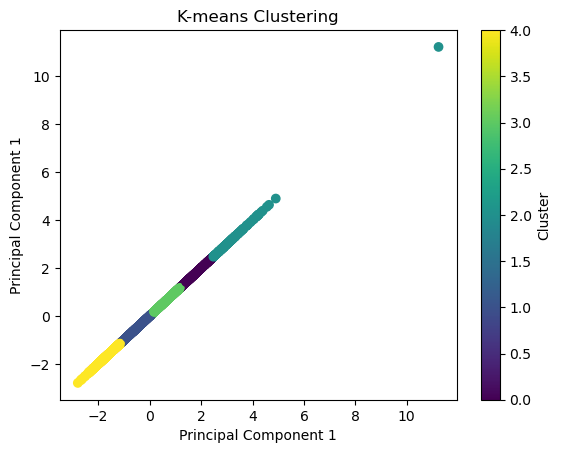

In [39]:
# Apply PCA on the imputed DataFrame
pca_data = pca.fit_transform(numeric_df_imputed)

# Print the shape of pca_data
print("Shape of pca_data:", pca_data.shape)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters
kmeans.fit(pca_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 0], c=cluster_labels, cmap='viridis')  # Update indexing if needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')  # Update label if needed
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()




### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [42]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Assuming df_cleaned is your DataFrame

# Drop any remaining missing values if any
df_cleaned.dropna(inplace=True)

# Extract features for clustering
features = ['Income', 'Recency', 'Total_Expenses', 'Num_Total_Purchases', 'TotalAcceptedCmp', 'Age']

# Initialize Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # You can adjust the number of clusters

# Fit Agglomerative Clustering on the original data
cluster_labels = agg_clustering.fit_predict(df_cleaned[features])

# Add cluster labels to the DataFrame
df_cleaned['Cluster'] = cluster_labels
print(df_cleaned)



    
#Cluster Distribution:

# Cluster 0 appears to be the largest cluster, followed by Cluster 2 and Cluster 1.
# The distribution of samples across clusters seems relatively balanced.
# Bivariate Analysis:

# Income Distribution by Cluster:
# Cluster 3 shows higher average incomes compared to other clusters, indicating a potentially affluent segment.
# Cluster 1 exhibits the lowest average income, suggesting a lower-income segment.
# Total Expenses by Cluster:
# Cluster 2 has the highest total expenses, indicating higher spending behavior.
# Cluster 0 and Cluster 4 have moderate total expenses, while Cluster 3 shows lower total expenses.
# Age Distribution by Cluster:
# Cluster 4 has a higher proportion of younger customers, while Cluster 3 consists of older individuals.
# Clusters 0, 1, and 2 show relatively balanced age distributions.

    

         ID   Education Marital_Status    Income  Kidhome  Teenhome  \
0      5524  Graduation         Single  0.234063        0         0   
1      2174  Graduation         Single -0.234559        1         1   
2      4141  Graduation   relationship  0.769478        0         0   
3      6182  Graduation   relationship -1.017239        1         0   
4      5324         PhD   relationship  0.240221        1         0   
...     ...         ...            ...       ...      ...       ...   
2235  10870  Graduation   relationship  0.356642        0         1   
2236   4001         PhD   relationship  0.467539        2         1   
2237   7270  Graduation         Single  0.188091        0         0   
2238   8235      Master   relationship  0.675388        0         1   
2239   9405         PhD   relationship  0.024705        1         1   

     Dt_Customer   Recency  MntWines  MntFruits  ...  AcceptedCmp1  \
0       4/9/2012  0.307039       635         88  ...             0   
1      

### Visualization and Interpretation of results

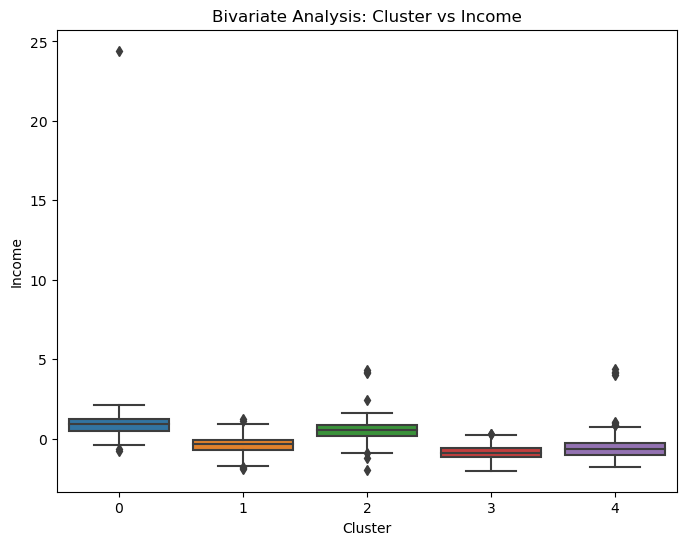

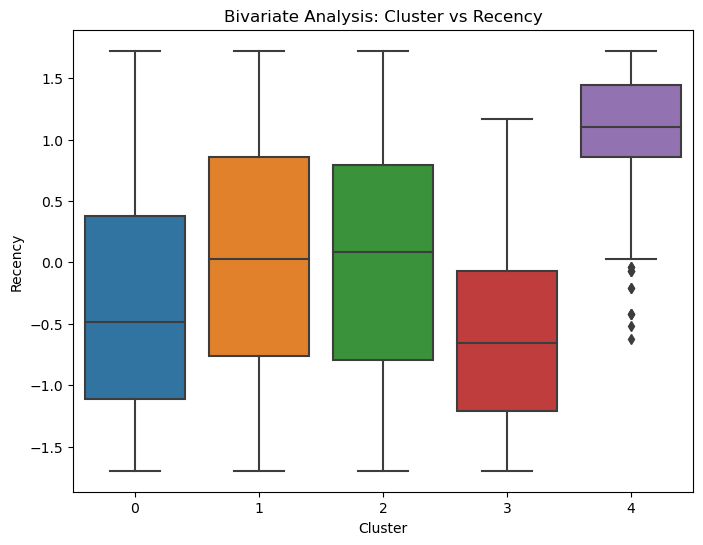

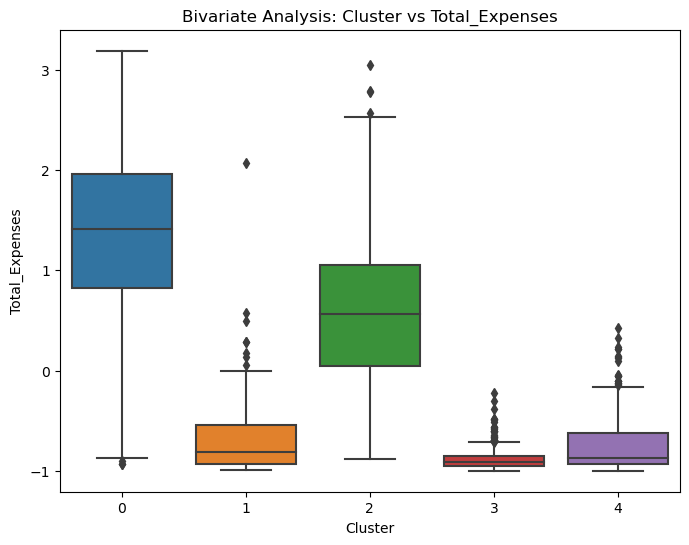

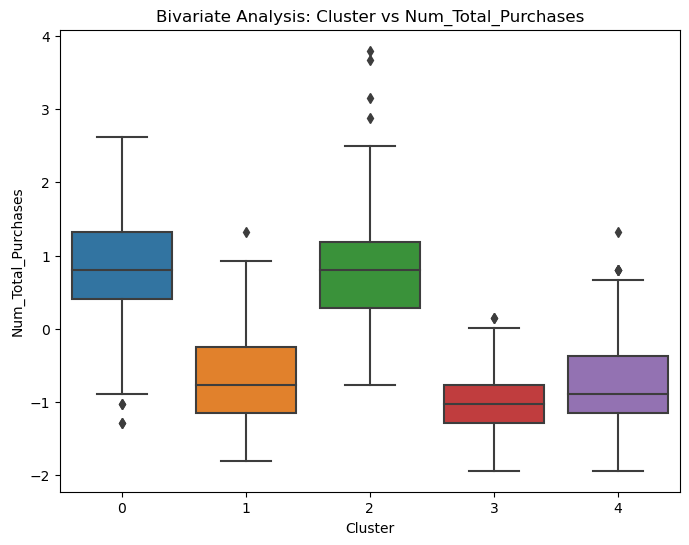

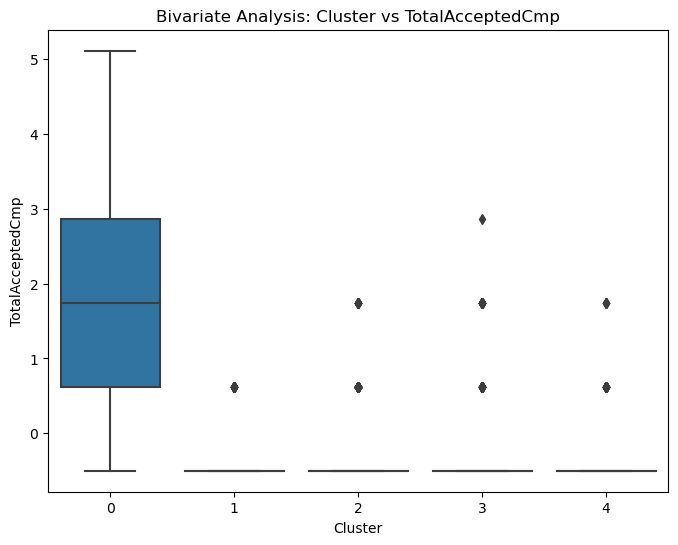

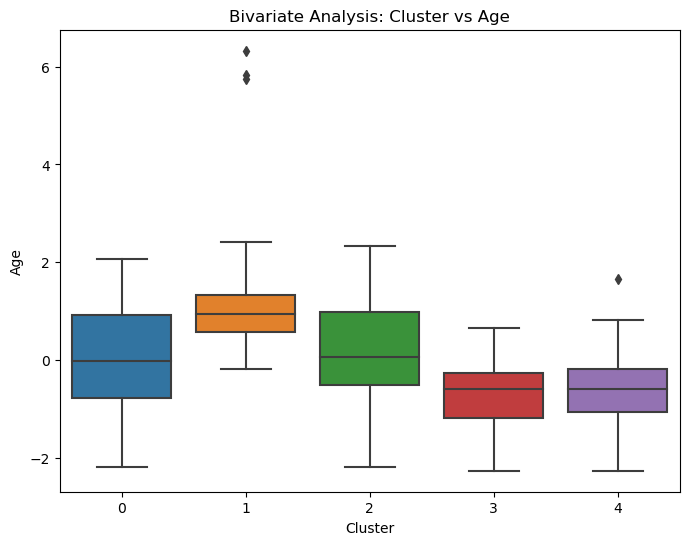

In [43]:
# Perform bivariate analysis
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_cleaned)
    plt.title(f'Bivariate Analysis: Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()
    
#     Interpretation:

# The variation in income and spending behavior across clusters suggests different levels of purchasing power and consumer behavior.
# Targeting marketing campaigns towards Cluster 3, with higher incomes, might yield better returns, while Cluster 1 may require more budget-conscious offerings.
# Understanding age demographics can help tailor products and services to specific age groups within each cluster.

-----
## Happy Learning
-----